# TP2: Interação e Concorrência

> Realizado por: \
> André Araújo    A87987  \
> Paulo Costa     A87986    
> Grupo 5
    


## Enunciado:


>Each group of students has a number assigned, N. Now, you have to use a quantum algorithm to find s \
$$s=N mod8$$ 
>in an unsorted list. \
\
>Implement the correct algorithm in a Jupyter Notebook file. Each work
should contain (and will be evaluated on) the following steps: 
>1. Division of the algorithm into sections; Utilisation of the state vector simulator to explain each step (special attention to the oracle); 
>2. Application of noise simulator to predict the best optimisation; 
>3. Execution in an IBM Q backend. 
>4. Mitigation of Error with Ignis. 

## Resolução:



In [1]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, transpile

from qiskit.tools.visualization import plot_histogram, plot_state_city, plot_state_hinton

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
backend_vector = Aer.get_backend("statevector_simulator")
backend = Aer.get_backend("qasm_simulator")

### 1)
>Para encontar o $s = 5$ numa lista não ordenada, vamos implementar o algoritmo de Grover apresentado como um algoritmo rápido para resolver problemas de procura em bases de dados ou listas não ordenadas, pois este consegue resolver estes problemas em apenas avaliações da função $\mathcal{O}(\sqrt{D})$, em que D é o tamanho do domínio da função, já o problema análogo na computação clássica não pode ser resolvido em menos de $\mathcal{O}(D)$ avaliações. \
\
>A implementação deste algoritmo tem 3 passos:
>>1. Inicializar o sistema;
>>2. Repetir $\sqrt{D}$ vezes:\
    a) O operador quantico oraculo;\
    b) A transformação de difusão;
>>3. Medir o valor dos qubits.

In [3]:
N=5
s = N % 8
print(N,'mod 8 =',s)
sb = bin(s)[2:] 
print(N,'em binario =',sb)

5 mod 8 = 5
5 em binario = 101


In [4]:
X=3

In [5]:
qr = QuantumRegister(X,'q')
cr = ClassicalRegister(X,'c')
qc = QuantumCircuit(qr,cr)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


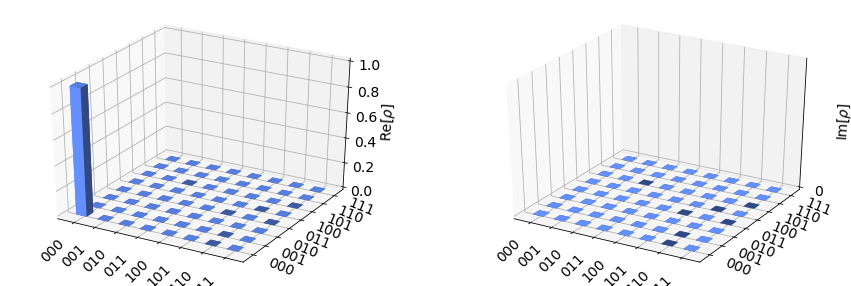

In [6]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)
plot_state_city(qstate)

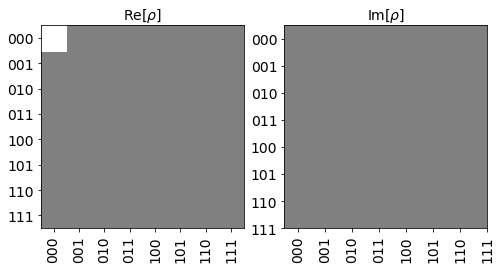

In [7]:
plot_state_hinton(qstate)

1. Começamos por inicializar o sistema em todos os estados possiveis com a mesma amplitude

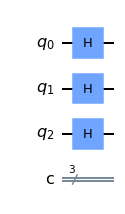

In [8]:
# init
qc.h(qr)

qc.draw(output='mpl')

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


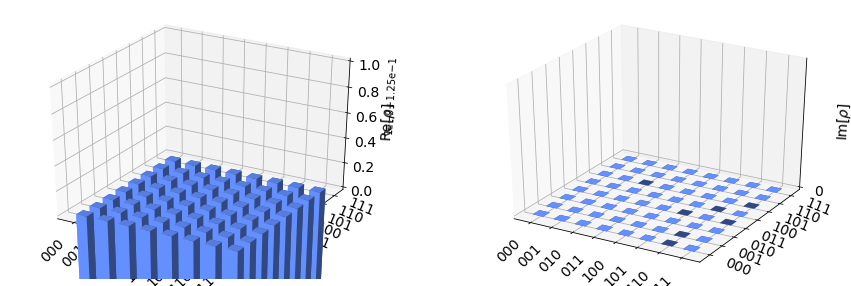

In [9]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)
plot_state_city(qstate)

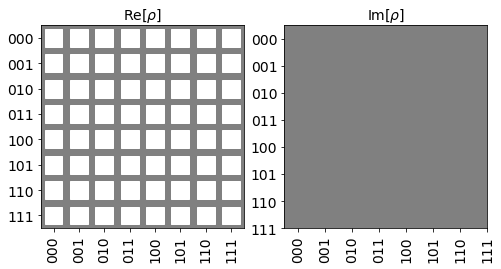

In [10]:
plot_state_hinton(qstate)

>2. a) 
>>O operador quantico oraculo $U_w$ é o responsavel por identificar as soluções para o problema e indicar o alvo da solução.  
    $$ U_w \lvert x \rangle = (−1)^f(x) \lvert x \rangle $$ 
>>,onde $f (\lvert 101 \rangle) = 1$ e $\forall_{xi 	\neq \lvert 101 \rangle}f (x) = 0$ . \
\
    Assim, desta forma o estado marcado roda $\pi$ radians marcando o valor simetrico e todos os outros estado mantem o sistema inalterado.\
    Para isso aplicamos a gate de Pauli-X no qubit 1 deforma a marcar o estado e de seguida aplicamos a gate CCZ como esta não existe compomos esta gate utilizando Hadamard  e CCX e voltamos a aplicar gate de Pauli-X no qubit 1. 

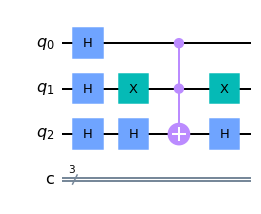

In [11]:
# Oraculo 
def oraculo():
    qc.x(qr[1])
    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])
    qc.x(qr[1])

oraculo()     
qc.draw(output='mpl')

[ 0.35355339+0.00000000e+00j  0.35355339-4.32978028e-17j
  0.35355339+0.00000000e+00j  0.35355339+0.00000000e+00j
  0.35355339+0.00000000e+00j -0.35355339+4.32978028e-17j
  0.35355339+0.00000000e+00j  0.35355339+0.00000000e+00j]


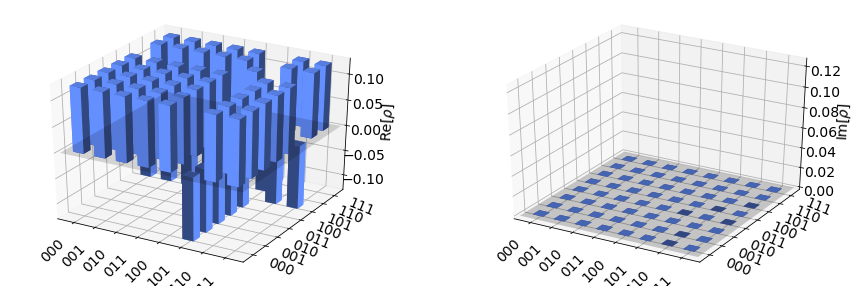

In [12]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)

print(qstate)
plot_state_city(qstate)

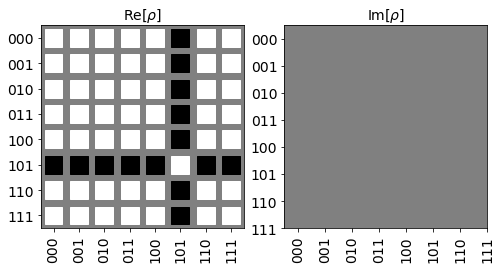

In [13]:
plot_state_hinton(qstate)

>2. b) 
>>A transformação de difusão é obtida ao aplicar a gate de Hadamard, seguida da gate Pauli-X a todos os qubits, depois aplicámos a gate CCZ através da composição das gates de Hadamard e CCX e, por fim, voltamos a aplicar as gates de Pauli-X e de Hadamard a todos os qubits, respetivamente. 
\
>>Ou seja, ao aplicar a transformação dada por: \
\
    $$H^{⊗n}(2 \lvert 0 \rangle  \langle 0 \lvert − I)H^{⊗n} $$ \
>>Esta transformação roda o input desejado e aumenta a sua amplitude.

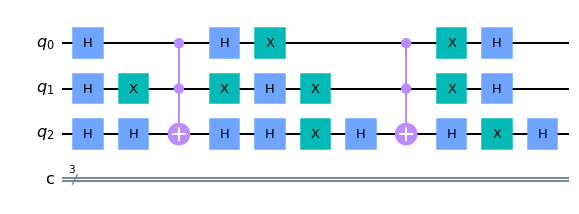

In [14]:
# difusor
def difusor():
    qc.h(qr)
    qc.x(qr)
    qc.h(qr[2])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.h(qr[2])
    qc.x(qr)
    qc.h(qr)
    
difusor()
qc.draw(output='mpl')

[-0.1767767 -2.16489014e-17j -0.1767767 +4.32978028e-17j
 -0.1767767 -3.07319371e-33j -0.1767767 +2.16489014e-17j
 -0.1767767 -1.65100229e-16j -0.88388348-2.40980805e-16j
 -0.1767767 -1.00153524e-16j -0.1767767 -1.65100229e-16j]


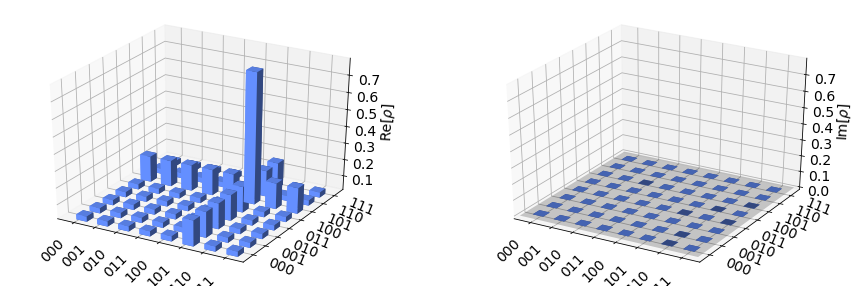

In [15]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)
plot_state_city(qstate)

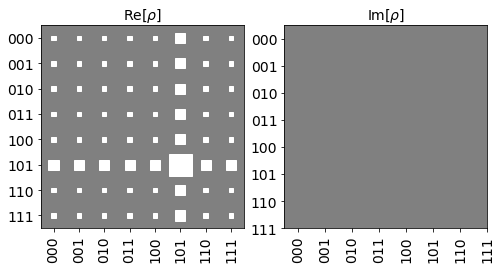

In [16]:
plot_state_hinton(qstate)

>2. Voltamos a reperir o oraculo e o difusor, isto porque no algoritmo de Grover devemos repetir o oraculo e o difusor $\sqrt{D}$, onde D é tamanho do domínio, como neste caso a lista tem 8 elementos e $\sqrt{8}=2$, repetimos o oraculo e o difusor mais uma vez.\
\
 De forma a conseguirmos melhorar, ainda mais, o resultado.

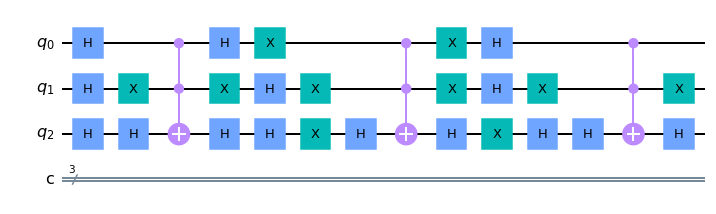

In [17]:
oraculo()     
qc.draw(output='mpl')

[-0.1767767 -4.32978028e-17j -0.1767767 +8.65956056e-17j
 -0.1767767 -2.16489014e-17j -0.1767767 -1.18630041e-32j
 -0.1767767 -1.29893408e-16j  0.88388348+4.32978028e-17j
 -0.1767767 -6.49467042e-17j -0.1767767 -8.65956056e-17j]


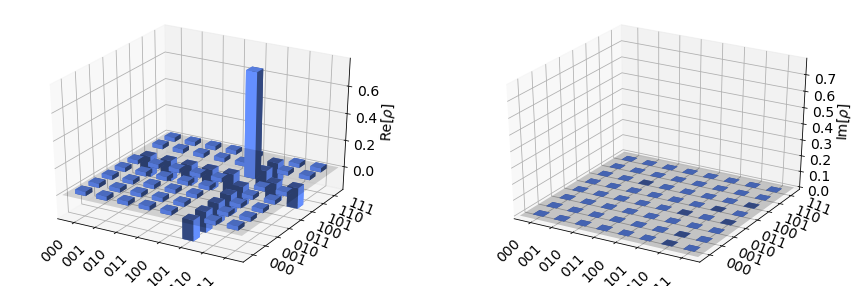

In [18]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)
plot_state_city(qstate)

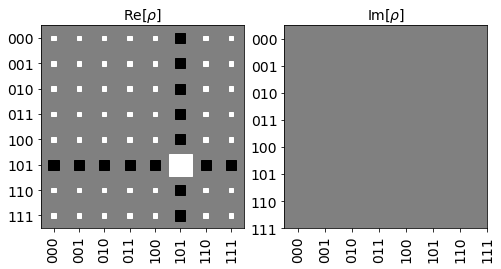

In [19]:
plot_state_hinton(qstate)

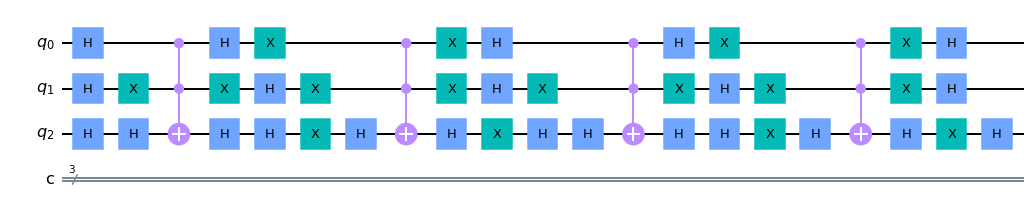

In [20]:
difusor()
qc.draw(output='mpl')

[-0.08838835-7.73659589e-33j -0.08838835+1.08244507e-17j
 -0.08838835+3.24733521e-17j -0.08838835+6.49467042e-17j
 -0.08838835-2.84278608e-17j  0.97227182+3.66828722e-16j
 -0.08838835-1.76034101e-17j -0.08838835+1.01465548e-16j]


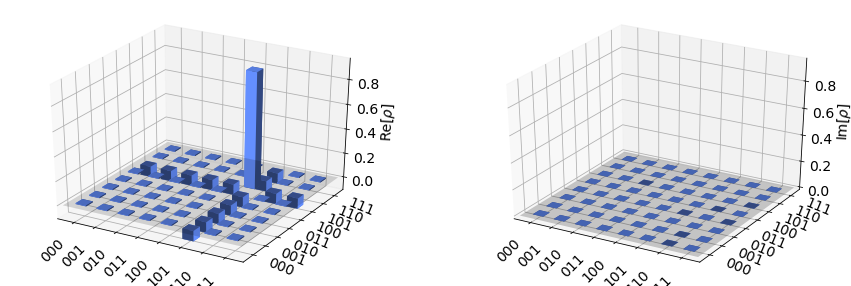

In [21]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)
plot_state_city(qstate)

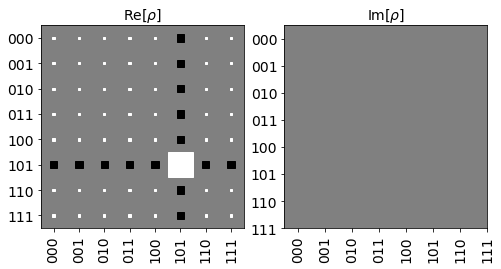

In [22]:
plot_state_hinton(qstate)

3. Medimos os valores dos qubits.

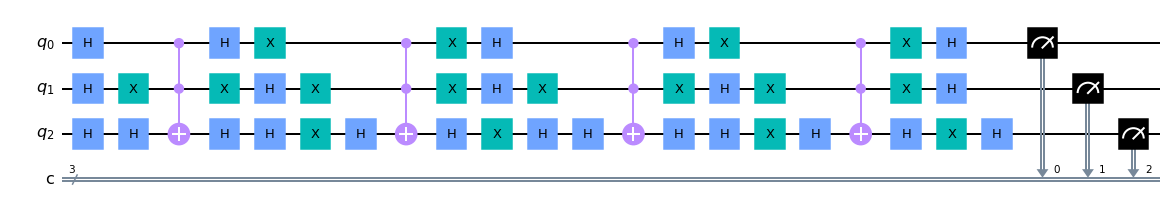

In [23]:
qc.measure(qr,cr)

qc.draw(output='mpl')

[ 0.+0.00000000e+00j -0.+0.00000000e+00j -0.+0.00000000e+00j
 -0.+0.00000000e+00j  0.+0.00000000e+00j  1.+3.77290294e-16j
  0.+0.00000000e+00j -0.+0.00000000e+00j]


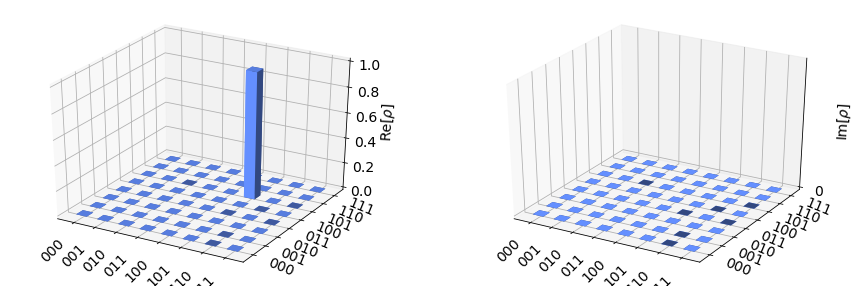

In [24]:
result = execute(qc, backend_vector).result()
qstate= result.get_statevector(qc)
print(qstate)
plot_state_city(qstate)

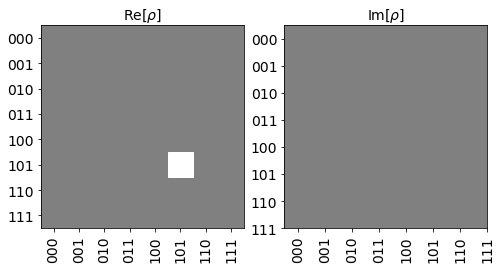

In [25]:
plot_state_hinton(qstate)

In [26]:
qc.depth()

22

>Simulamos agora o resultado, obtendo o resultado ideal.

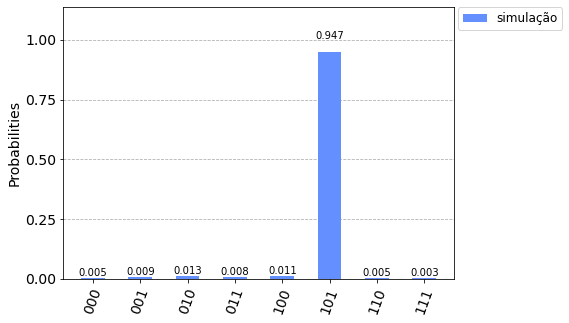

In [27]:
shots=1024
result = execute(qc, backend, shots=shots).result()
counts_sim = result.get_counts(qc)
plot_histogram(counts_sim , legend=['simulação'])

### 2) Aplicação do simulador de ruido para prever a melhor otimisação

In [28]:
provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

>Escolhemos um servidor que continha a média de erros mais baixas para as operações que pretendemos realizar.

In [29]:
import qiskit.tools.jupyter
%qiskit_backend_overview

In [30]:
from qiskit.tools.monitor import backend_overview, backend_monitor
backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 3              Pending Jobs: 5              Pending Jobs: 6
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      151.0          Avg. T1:      75.2           Avg. T1:      79.3
Avg. T2:      67.0           Avg. T2:      73.2           Avg. T2:      91.6



ibmq_lima                    ibmq_santiago                ibmq_athens
---------                    -------------                -----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 12             Pending Jobs: 5              Pending Jobs: 0
Least busy:   False          Least busy:   False          Least busy:   True
Operational:  True           Operatio

In [31]:
backend_device = provider.get_backend('ibmq_santiago')
print("Running on: ", backend_device)

Running on:  ibmq_santiago


In [32]:
backend_monitor(backend_device)

ibmq_santiago
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 5
    backend_version: 1.3.22
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    input_allowed: ['job']
    n_registers: 1
    allow_q_object: True
    parametric_pulses: ['gaussian', 'gaussian_square', 'drag', 'constant']
    conditional_latency: []
    online_date: 2020-06-03 04:00:00+00:00
    meas_lo_range: [[6.952624018e+18, 7.952624018e+18], [6.701014434e+18, 7.701014434e+18], [6.837332258e+18, 7.837332258e+18], [6.901770712e+18, 7.901770712e+18], [6.775814414e+18, 7.775814414e+18]]
    multi_meas_enabled: True
    meas_map: [[0, 1, 2, 3, 4]]
    max_shots: 8192
    meas_levels: [1, 2]
    pulse_num_channels: 9
    channels: {'acquire0': {'operates': {'qubits': [0]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire1': {'operates': {'qubits': [1]}, 'purpose': 'acquire', 'type': 'acquire'}, 'acquire2': {'operates':

In [33]:
# See backend information
backend_device

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

#### Simulação com ruido
>Com o NoiseModel, é possível construir um modelo de ruído aproximado consistindo em:
>* erros de gates de um qubit
>* erros de gates de dois qubit
>* erros de leitura de um qubit

In [34]:
coupling_map = backend_device.configuration().coupling_map

In [35]:
from qiskit.providers.aer.noise import NoiseModel

In [36]:
noise_model = NoiseModel.from_backend(backend_device)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['id', 'measure', 'cx', 'reset', 'sx', 'x']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('sx', [0]), ('sx', [1]), ('sx', [2]), ('sx', [3]), ('sx', [4]), ('x', [0]), ('x', [1]), ('x', [2]), ('x', [3]), ('x', [4]), ('cx', [4, 3]), ('cx', [3, 4]), ('cx', [2, 3]), ('cx', [3, 2]), ('cx', [2, 1]), ('cx', [1, 2]), ('cx', [0, 1]), ('cx', [1, 0]), ('reset', [0]), ('reset', [1]), ('reset', [2]), ('reset', [3]), ('reset', [4]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


In [37]:
basis_gates = noise_model.basis_gates
print(basis_gates)

['cx', 'id', 'reset', 'rz', 'sx', 'x']


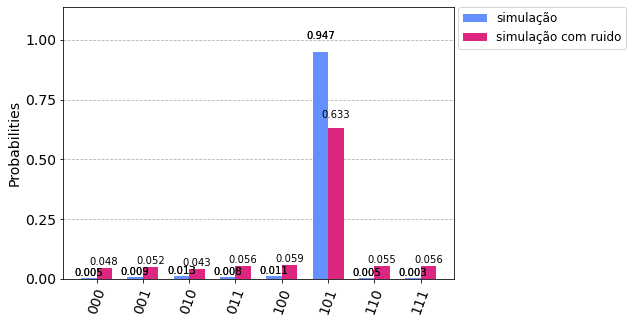

In [38]:
# Execute noisy simulation and get counts
result_noise = execute(qc, backend, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(qc)
plot_histogram([ counts_sim ,counts_noise], legend=[ 'simulação', 'simulação com ruido'])

#### Otimização

82


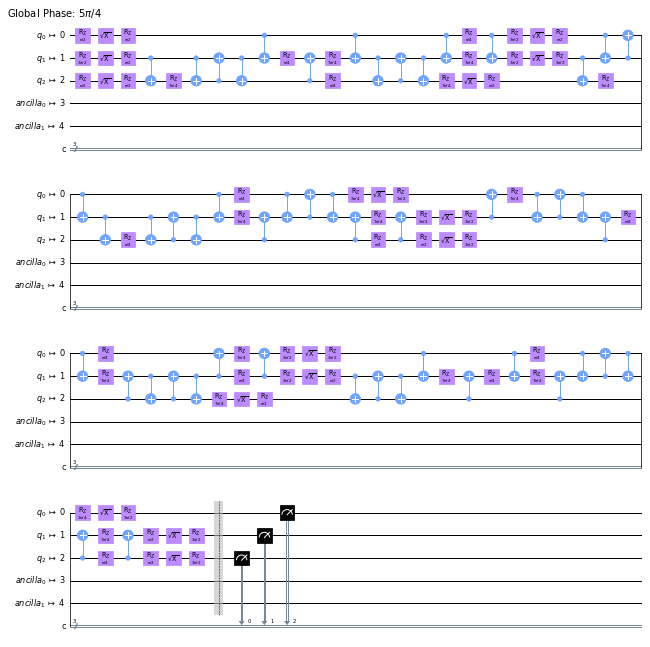

In [39]:
from qiskit.compiler import transpile

qc_t_real = transpile(qc, backend=backend_device)
print(qc_t_real.depth())
qc_t_real.draw(output='mpl', scale=0.5)

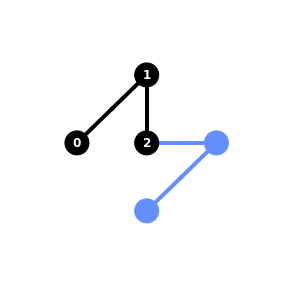

In [40]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc_t_real, backend_device)

**Otimização de nivel 1**

85


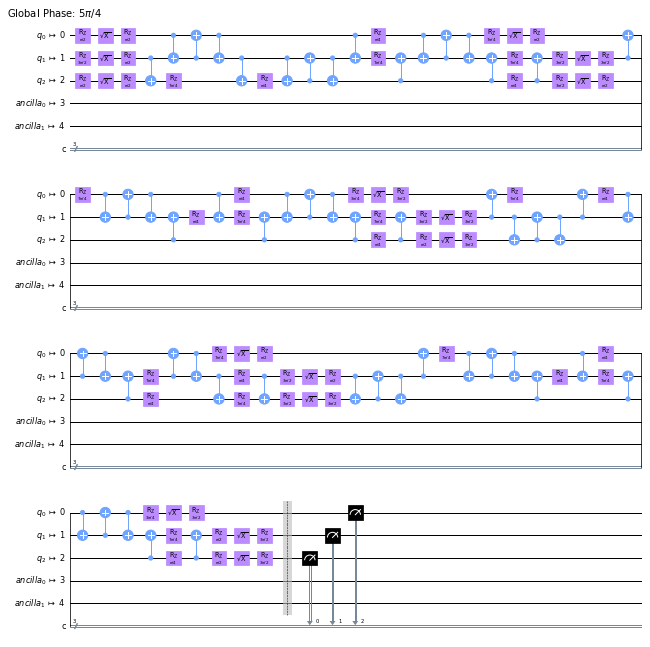

In [41]:
qc_optimized_1 = transpile(qc, backend=backend_device, optimization_level=1)
print(qc_optimized_1.depth())
qc_optimized_1.draw(output='mpl', scale=0.5)

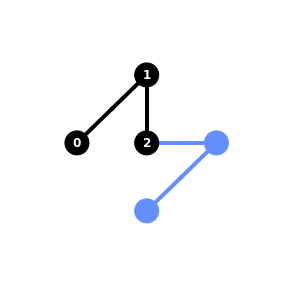

In [42]:
plot_circuit_layout(qc_optimized_1, backend_device)

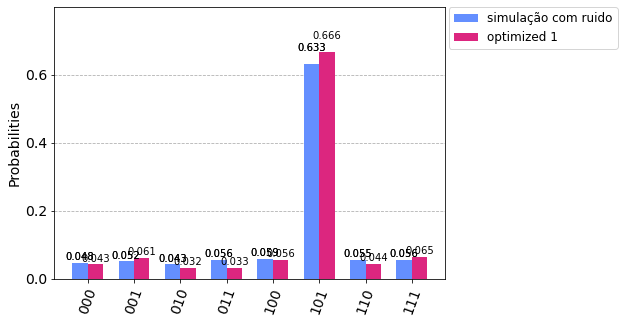

In [43]:
result_optimized_1 = execute(qc_optimized_1, backend, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()

counts_optimized_1 = result_optimized_1.get_counts(qc_optimized_1)

plot_histogram([counts_noise,counts_optimized_1], legend=['simulação com ruido','optimized 1'])


**Otimização de nivel 2**

91


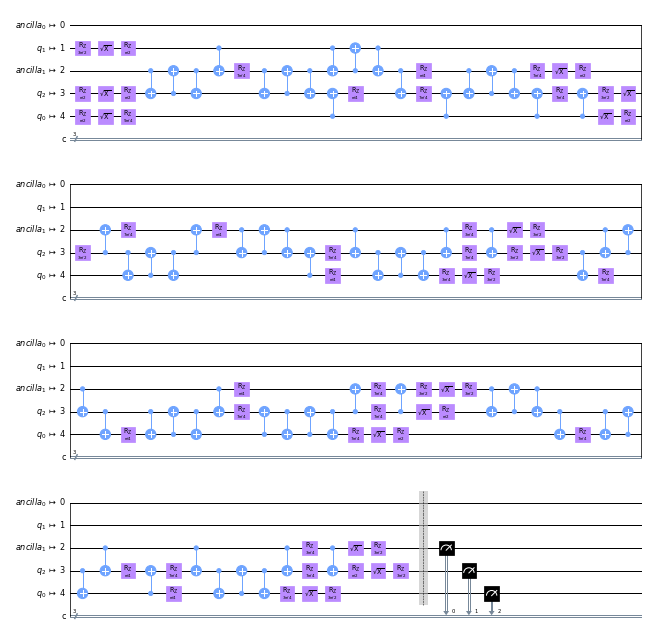

In [44]:
qc_optimized_2 = transpile(qc, backend=backend_device, optimization_level=2)
print(qc_optimized_2.depth())
qc_optimized_2.draw(output='mpl', scale=0.5)

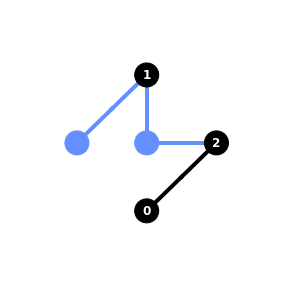

In [45]:
plot_circuit_layout(qc_optimized_2, backend_device)

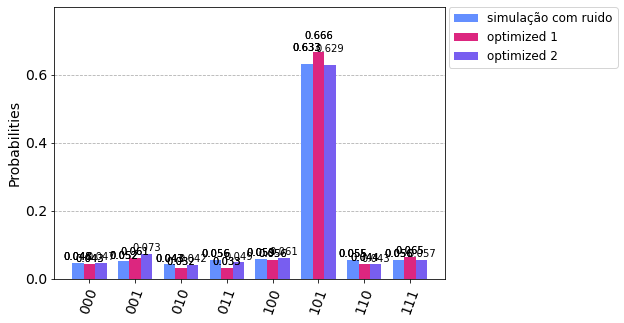

In [46]:
result_optimized_2 = execute(qc_optimized_2, backend, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()

counts_optimized_2 = result_optimized_2.get_counts(qc_optimized_2)
plot_histogram([counts_noise,counts_optimized_1,counts_optimized_2], legend=[ 'simulação com ruido','optimized 1','optimized 2'])

**Otimização de nivel 3**

112


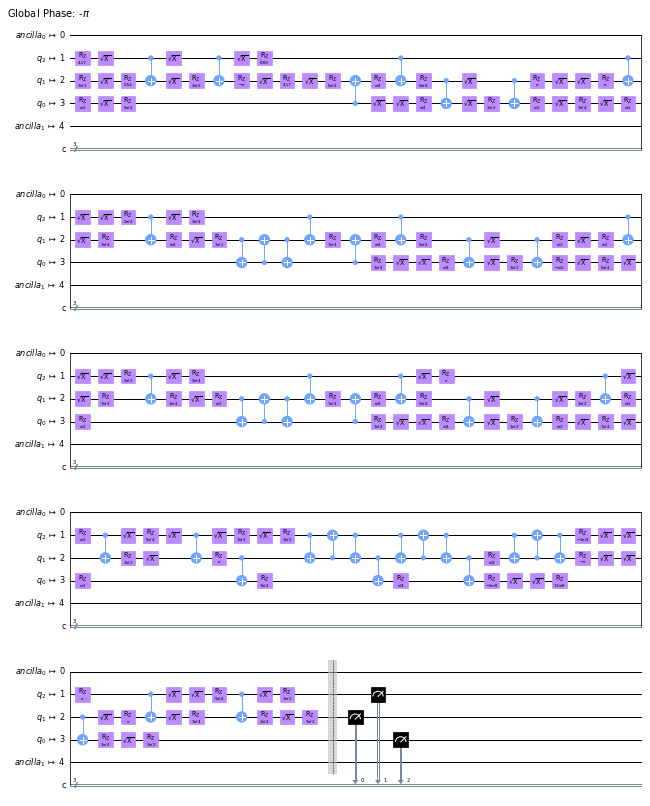

In [47]:
qc_optimized_3 = transpile(qc, backend=backend_device, optimization_level=3)
print(qc_optimized_3.depth())
qc_optimized_3.draw(output='mpl', scale=0.5)

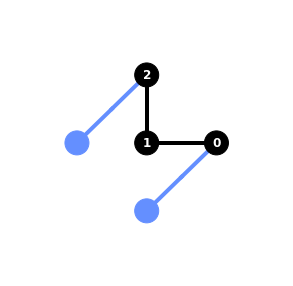

In [48]:
plot_circuit_layout(qc_optimized_3, backend_device)

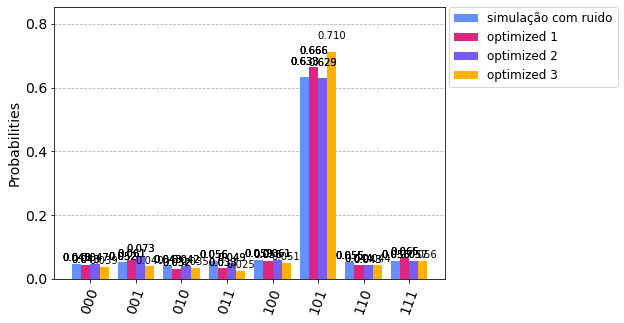

In [49]:
result_optimized_3 = execute(qc_optimized_3, backend, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()

counts_optimized_3 = result_optimized_3.get_counts(qc_optimized_3)
plot_histogram([counts_noise,counts_optimized_1,counts_optimized_2,counts_optimized_3], legend=['simulação com ruido','optimized 1','optimized 2','optimized 3'])

Podemos ver que a otimização de nivel 3 apesar de realizar mais operações é a otimização com melhores resultados.

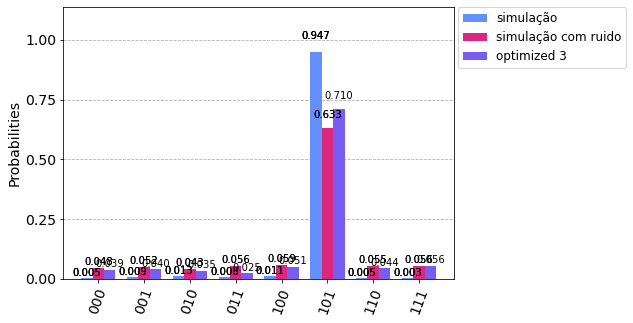

In [50]:
plot_histogram([ counts_sim ,counts_noise,counts_optimized_3], legend=[ 'simulação', 'simulação com ruido','optimized 3'])

### 3) Execução em uma IBM Q backend.

In [51]:
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [52]:
job_r = execute(qc, backend_device, shots=shots)

jobID_r = job_r.job_id()

print('JOB ID: {}'.format(jobID_r))

JOB ID: 60bbc406917aa0cbfc9b6f11


In [53]:
job_get=backend_device.retrieve_job(jobID_r)

result_r = job_get.result()
counts_run = result_r.get_counts(qc)

Comparando agora os resultados obtidos:

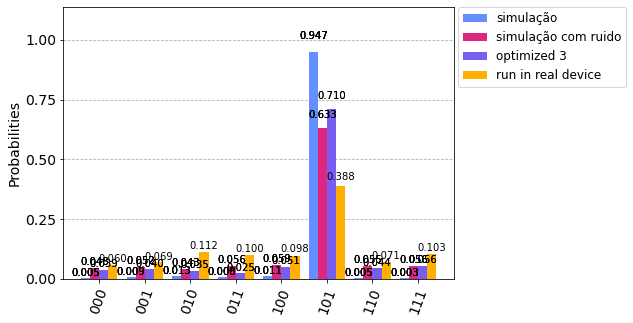

In [54]:
plot_histogram([counts_sim, counts_noise,counts_optimized_3,counts_run  ], legend=[ 'simulação', 'simulação com ruido','optimized 3','run in real device' ])

### 4) Mitigação dos erros com Ignis.

In [55]:
# Import measurement calibration functions
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, tensored_meas_cal,
                                                 CompleteMeasFitter, TensoredMeasFitter)

**Matrizes  de calibração**
>Geramos a lista de circuitos de calibração de medição. \
>Cada circuito cria um estado básico. \
>Uma vez que medimos 3 qubits, precisamos de $ 2^{3} = 8 $ circuitos de calibração.

In [56]:
# Generate the calibration circuits
qr = QuantumRegister(X)

# meas_calibs:
# list of quantum circuit objects containing the calibration circuits
# state_labels:
# calibration state labels
meas_calibs, state_labels = complete_meas_cal(qubit_list=[0,1,2], qr=qr, circlabel='mcal')

In [57]:
state_labels

['000', '001', '010', '011', '100', '101', '110', '111']

**Calculamos a matriz de calibração**
\
Se não houvesse ruído no dispositivo, a matriz de calibração seria a matriz identidade $ 8 \times 8 $. Como calculamos essa matriz com um dispositivo quântico real, existe algum ruído.

In [58]:
job_ignis = execute(meas_calibs, backend=backend_device, shots=shots)

jobID_run_ignis = job_ignis.job_id()

print('JOB ID: {}'.format(jobID_run_ignis))

JOB ID: 60bbc44200adedebcd6a70c5


In [59]:
job_get=backend_device.retrieve_job(jobID_run_ignis)

cal_results = job_get.result()

In [60]:
%qiskit_disable_job_watcher

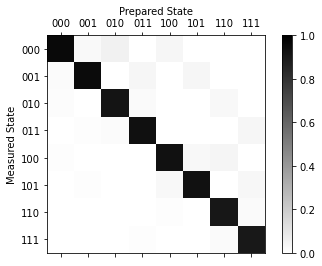

In [61]:
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

# Plot the calibration matrix
meas_fitter.plot_calibration()

**Análise dos resultados**\
A fidelidade de atribuição média é o traço da matriz anterior.

In [62]:
print("Average Measurement Fidelity: %f" % meas_fitter.readout_fidelity())

Average Measurement Fidelity: 0.929077


**Aplicamos a calibração**\
Aplicamos um filtro baseado na matriz de calibração para obter a contagem mitigada.

In [63]:
# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(result_r)
mitigated_counts = mitigated_results.get_counts()

E, por fim, voltamos a comparar os resultados todos:

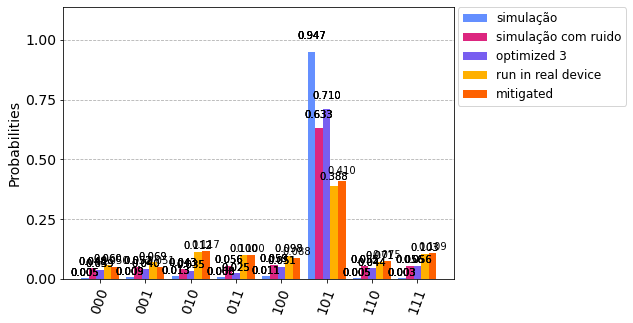

In [64]:
plot_histogram([counts_sim ,counts_noise,counts_optimized_3, counts_run, mitigated_counts ], legend=['simulação','simulação com ruido','optimized 3','run in real device', 'mitigated'])

Podemos ver que a mitigação dos erros melhora ligeiramente o resultado obtido.

## Conclusão:

> Concluímos então este trabalho prático relativamente à UC Interação e Concorrência.  
\
>Achamos que os objetivos foram bem alcançados e em que foi, sem dúvida, uma boa forma de colocar os conceitos em prática, conceitos estes que ao início poderiam estar um pouco mais “enferrujados” e que acabaram por ser polidos e agora achamos que finalizamos da melhor forma!